<a href="https://colab.research.google.com/github/RitulMohan/AIML_Chatbot/blob/main/ML_assignment1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#/content/drive/MyDrive/ML_assignments 4-2/asign1_data.csv

import pandas as pd
header_names = ['YEAR','Rainfall in June']
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/ML_assignments 4-2/asign1_data.csv",usecols=header_names)



In [3]:
df.head()

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1


In [4]:
df.describe()

,YEAR,Rainfall in June
count,117.000000,113.000000
mean,1958.606838,72.957522
std,33.389023,35.968989
min,1901.000000,17.700000
25%,1930.000000,48.500000
50%,1959.000000,69.900000
75%,1987.000000,90.600000
max,2015.000000,161.000000


In [5]:
nan_count = df["Rainfall in June"].isna().sum()
nan_count

4

In [6]:
med= df["Rainfall in June"].median()
med

69.9

In [7]:
df["Rainfall in June"] = df["Rainfall in June"].fillna(med)

In [8]:
nan_count = df["Rainfall in June"].isna().sum()
nan_count

0

In [9]:
df

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


In [10]:
df_updated= df.drop_duplicates()

In [11]:
df_updated

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


In [12]:
import matplotlib.pyplot as plt

>In case the distribution's mean and median are near to one another, it is probably symmetric.

>Right-skewed distributions (positively skewed distributions) can occur when the mean exceeds the median.

>A left-skewed (negatively skewed) distribution might result from the mean being smaller than the median.


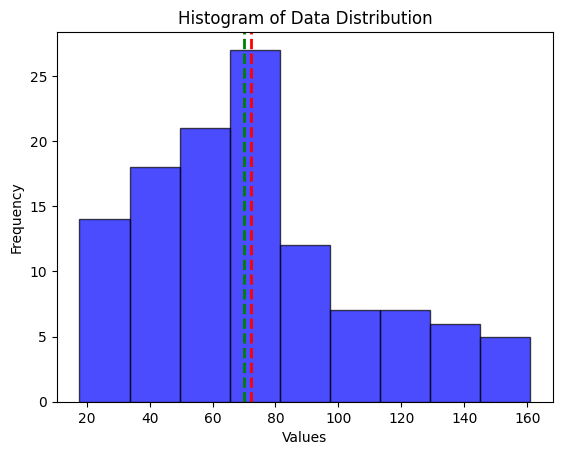

In [13]:
plt.hist(df['Rainfall in June'], bins='auto', alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data Distribution')

# Add a vertical line for the mean
mean_value = df_updated['Rainfall in June'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the median
median_value = df_updated['Rainfall in June'].median()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [15]:
nan_count = df_updated.isna().sum()
nan_count

YEAR                0
Rainfall in June    0
dtype: int64

In [16]:
data_to_scale = df_updated[['Rainfall in June']]


standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

standard_scaled_data = standard_scaler.fit_transform(data_to_scale)

#min-max scaling
min_max_scaled_data = min_max_scaler.fit_transform(data_to_scale)

# Convert scaled arrays back to DataFrames for comparison
df_standard_scaled = pd.DataFrame(standard_scaled_data, columns=['StandardScaled'])
df_min_max_scaled = pd.DataFrame(min_max_scaled_data, columns=['MinMaxScaled'])

# Concatenate the original DataFrame with the scaled DataFrames
df_scaled = pd.concat([df_updated, df_standard_scaled, df_min_max_scaled], axis=1)

# Display the DataFrame with scaled columns
print(df_scaled.head())

     YEAR  Rainfall in June  StandardScaled  MinMaxScaled
0  1901.0              22.7       -1.417921      0.034892
1  1902.0              59.9       -0.352687      0.294487
2  1903.0              26.2       -1.317697      0.059316
3  1904.0              53.4       -0.538817      0.249128
4  1905.0              23.1       -1.406466      0.037683


In [17]:
nan_count = df_scaled.isna().sum()
nan_count

YEAR                2
Rainfall in June    2
StandardScaled      2
MinMaxScaled        2
dtype: int64

In [18]:
X = df_updated[['YEAR']]  # Replace with your features
y = df_updated[['Rainfall in June']]

# 3. Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 32.10
Mean Squared Error (MSE): 1565.24
Root Mean Squared Error (RMSE): 39.56


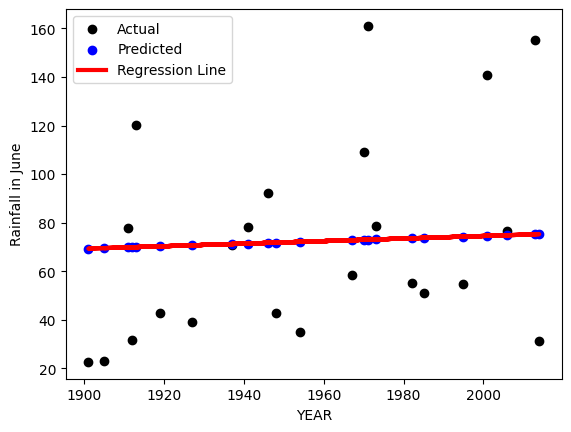

In [19]:
plt.scatter(X_test['YEAR'], y_test, color='black', label='Actual')
plt.scatter(X_test['YEAR'], y_pred, color='blue', label='Predicted')

plt.plot(X_test['YEAR'], model.predict(X_test[['YEAR']]), color='red', linewidth=3, label='Regression Line')


plt.xlabel('YEAR')
plt.ylabel('Rainfall in June')
plt.legend()
plt.show()

In [20]:
df_scaled = df_scaled.dropna()


In [21]:
X = df_scaled[['YEAR']]  # Replace with your features
y = df_scaled[['StandardScaled']]

# 3. Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.82
Mean Squared Error (MSE): 0.99
Root Mean Squared Error (RMSE): 0.99


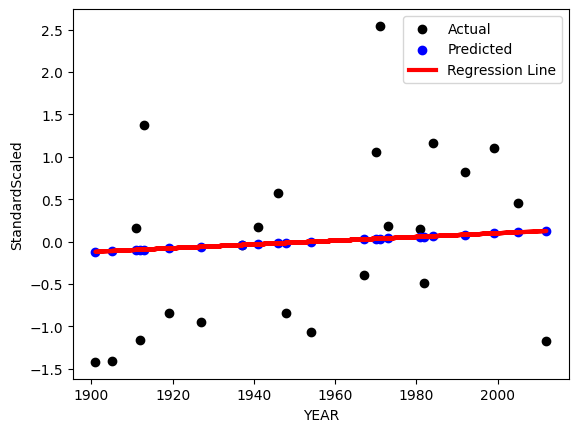

In [22]:
plt.scatter(X_test['YEAR'], y_test, color='black', label='Actual')
plt.scatter(X_test['YEAR'], y_pred, color='blue', label='Predicted')

plt.plot(X_test['YEAR'], model.predict(X_test[['YEAR']]), color='red', linewidth=3, label='Regression Line')

plt.xlabel('YEAR')
plt.ylabel('StandardScaled')
plt.legend()
plt.show()

In [23]:
X = df_scaled[['YEAR']]  # Replace with your features
y = df_scaled[['MinMaxScaled']]

# 3. Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24


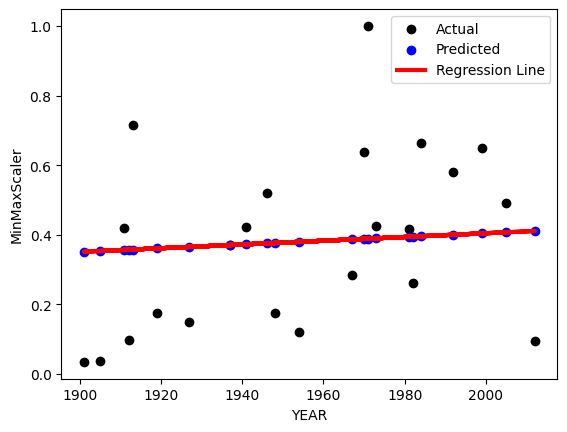

In [24]:
plt.scatter(X_test['YEAR'], y_test, color='black', label='Actual')
plt.scatter(X_test['YEAR'], y_pred, color='blue', label='Predicted')
plt.plot(X_test['YEAR'], model.predict(X_test[['YEAR']]), color='red', linewidth=3, label='Regression Line')
plt.xlabel('YEAR')
plt.ylabel('MinMaxScaler')
plt.legend()
plt.show()

In [25]:
X = df_updated[['YEAR']]  # Replace with your features
y = df_updated[['Rainfall in June']]

# 3. Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create and train the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 32.21
Mean Squared Error (MSE): 1485.30
Root Mean Squared Error (RMSE): 38.54


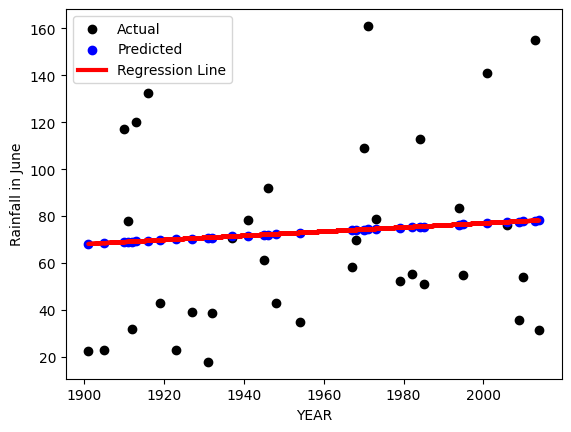

In [26]:
plt.scatter(X_test['YEAR'], y_test, color='black', label='Actual')
plt.scatter(X_test['YEAR'], y_pred, color='blue', label='Predicted')

plt.plot(X_test['YEAR'], model.predict(X_test[['YEAR']]), color='red', linewidth=3, label='Regression Line')


plt.xlabel('YEAR')
plt.ylabel('Rainfall in June')
plt.legend()
plt.show()

In [27]:
X = df_scaled[['YEAR']]  # Replace with your features
y = df_scaled[['StandardScaled']]

# 3. Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create and train the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.90
Mean Squared Error (MSE): 1.19
Root Mean Squared Error (RMSE): 1.09


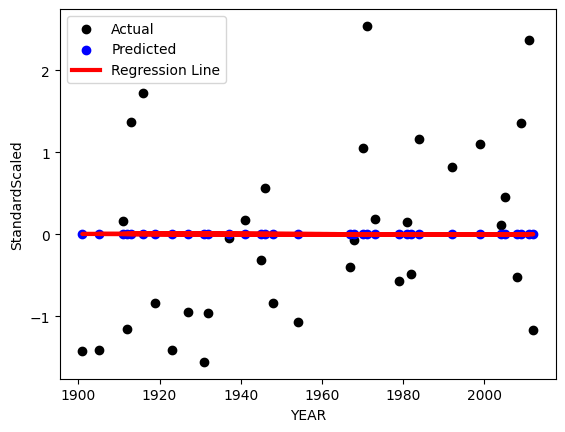

In [28]:
plt.scatter(X_test['YEAR'], y_test, color='black', label='Actual')
plt.scatter(X_test['YEAR'], y_pred, color='blue', label='Predicted')

plt.plot(X_test['YEAR'], model.predict(X_test[['YEAR']]), color='red', linewidth=3, label='Regression Line')

plt.xlabel('YEAR')
plt.ylabel('StandardScaled')
plt.legend()
plt.show()

In [29]:
X = df_scaled[['YEAR']]  # Replace with your features
y = df_scaled[['MinMaxScaled']]

# 3. Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create and train the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.07


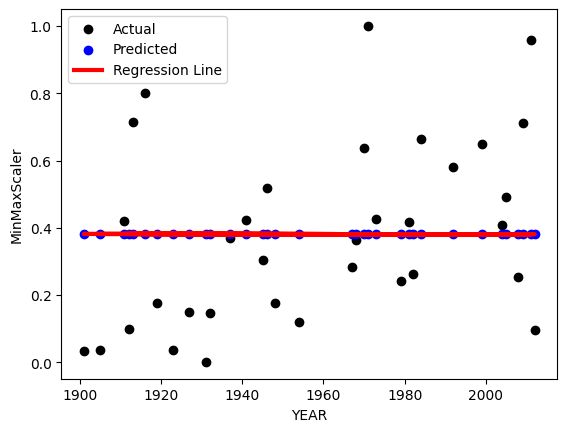

In [30]:
plt.scatter(X_test['YEAR'], y_test, color='black', label='Actual')
plt.scatter(X_test['YEAR'], y_pred, color='blue', label='Predicted')
plt.plot(X_test['YEAR'], model.predict(X_test[['YEAR']]), color='red', linewidth=3, label='Regression Line')
plt.xlabel('YEAR')
plt.ylabel('MinMaxScaler')
plt.legend()
plt.show()